<a href="https://colab.research.google.com/github/Aashrit77/Python/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
uni = pd.read_csv("/content/Universities.csv")

In [3]:
uni.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [4]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
uni_df = scalar.fit_transform(uni.iloc[:,1:])

In [7]:
uni_df

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

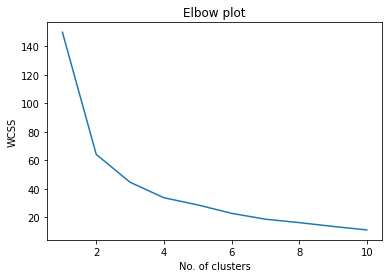

In [11]:
wcss = []  # within cluster sum of squares - which is nothig but the inertia which is the avg dist within the cluster which is built every time and stored in the list we made here
for i in range (1,11):  
  kmeans = KMeans(n_clusters=i,random_state=0) #random_state is that randomly the data has to be partitioned but we put 0 here as we want to reproduce the vales again
  kmeans.fit(uni_df)
  wcss.append(kmeans.inertia_) #this basically means if k=2 and the value obtained is say 120 then we will apend it into the wcss list till 10

plt.plot(range(1,11),wcss)
plt.title("Elbow plot")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.show()


In [12]:
cluster_new = KMeans(4,random_state=42) # you can use any number but must be constant throughout
cluster_new.fit(uni_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [13]:
cluster_new.labels_

array([0, 3, 2, 0, 2, 0, 0, 2, 0, 3, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 2,
       2, 1, 0], dtype=int32)

In [14]:
uni["clusterid_name"] = cluster_new.labels_

In [15]:
uni

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_name
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,3
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,2
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,2
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,3


In [17]:
uni.groupby(["clusterid_name"]).agg(["mean"]).reset_index()

,clusterid_name,SAT,Top10,Accept,SFRatio,Expenses,GradRate
,,mean,mean,mean,mean,mean,mean
0,0,1351.666667,89.444444,21.777778,11.00,33615.555556,93.777778
1,1,1061.500000,38.750000,70.000000,19.25,9953.000000,71.750000
2,2,1253.000000,77.700000,43.500000,12.90,22008.200000,86.900000
3,3,1360.000000,87.500000,34.500000,6.50,61133.000000,84.000000
